In [1]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [6]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [10]:
length(colSums(table(sce$experiment, sce$donor)>0)[colSums(table(sce$experiment, sce$donor)>0)>1])

[1] 33

In [5]:
df = data.frame(donor = unique(sce$donor_long_id))
head(df)

donor
HPSI0114i-joxm_1
HPSI0314i-fafq_1
HPSI1013i-wuye_2
HPSI0114i-iisa_3
HPSI0114i-lexy_1
HPSI1013i-hiaf_2


In [7]:
write.csv(df,"/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/donors_endodiff.csv", quote = F,
         row.names = F)

In [3]:
pca.500hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))

In [7]:
E = pca.500hvgs$x
head(E)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
21843_1#10,-11.7695261,-12.53787,1.182187,-12.382809,-7.138403,-3.4703788,2.937177,-1.4780896,-2.9866449,-3.499148,...,0.2160482,-0.001807227,-0.4704439,-0.38897205,-0.9991925,-0.6878494,-0.22135254,-0.01443568,1.2095867,-0.006544411
21843_1#100,5.1315308,-27.27887,7.580548,-8.358297,-1.009093,-1.7577853,-6.091796,0.8270303,-8.8730029,3.518848,...,0.3031433,1.166374296,0.9316655,0.89767361,-0.8016822,0.2290320,0.64763610,0.85628896,-1.3086225,-0.007651583
21843_1#101,-0.6430211,-23.48309,-1.000591,-3.088449,-1.289849,-1.5541213,-1.469672,0.2329820,-0.7080887,5.016711,...,-0.7761433,0.031156078,0.1829774,-0.14923369,-0.5788981,0.2717518,0.75835568,0.00108464,0.1528594,-0.002594181
21843_1#102,-14.5080208,-12.97380,1.756366,-5.051092,-13.428509,-4.9241155,3.345865,1.1722049,1.1701299,1.799291,...,-1.1940182,0.653650128,-1.4879523,0.40670022,0.1799348,-1.2709706,-0.03973878,0.39435883,0.3794893,-0.003221728
21843_1#103,-5.8029849,-18.93912,-3.213669,-2.972856,-7.899498,0.3855256,3.110171,2.0104264,-0.4341895,-2.414581,...,-0.9986720,0.344452018,-0.6746511,-0.09003629,-0.9505944,-0.5087790,-0.27308513,0.78496806,-0.3265529,-0.005177596
21843_1#105,-2.3442226,-20.86842,-2.850288,-3.369348,-1.915029,-9.2527614,1.396011,2.1962256,-6.2875656,-4.725231,...,-1.8174132,0.912610178,-0.8024645,-0.66096338,-1.1554879,0.1583705,-0.94767054,0.13668247,1.3098005,-0.003567344


In [8]:
write.csv(E, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/pcs_500hvgs.csv")

In [5]:
E_norm = E - colMeans(E) / colVars(E)
# hist(E_norm[,3])
matnum = E_norm %*% t(E_norm)

In [12]:
library(ComplexHeatmap)
library(circlize)

In [7]:
matnum[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
21843_1#10,545.4275,402.4599,333.5571,509.2901,409.7289
21843_1#100,402.4599,1030.8098,692.6366,333.7373,472.7122
21843_1#101,333.5571,692.6366,594.3707,356.3638,454.5593
21843_1#102,509.2901,333.7373,356.3638,629.1479,451.3644
21843_1#103,409.7289,472.7122,454.5593,451.3644,493.8149


In [8]:
# write.csv(matnum, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/EEt_10pcs.csv")

In [3]:
table(sce$donor_long_id)[table(sce$donor_long_id)>800]
top_donors = names(table(sce$donor_long_id)[table(sce$donor_long_id)>800])
top_donors


HPSI0114i-joxm_1 HPSI0214i-poih_4 HPSI0314i-sojd_3 HPSI0413i-nudd_1 
            1415             1077              880              919 
HPSI0514i-letw_1 HPSI0813i-guss_1 
             801             1093 

[1] "HPSI0114i-joxm_1" "HPSI0214i-poih_4" "HPSI0314i-sojd_3" "HPSI0413i-nudd_1"
[5] "HPSI0514i-letw_1" "HPSI0813i-guss_1"

In [13]:
cells = colnames(sce[,sce$donor_long_id %in% top_donors])
cells = cells[order(sce[,sce$donor_long_id %in% top_donors]$PC1_top500hvgs)]

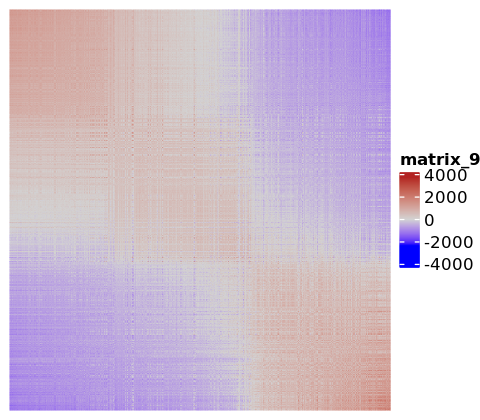

In [21]:
options(repr.plot.width = 4, repr.plot.height = 3.5)
Heatmap(matnum[cells,cells], cluster_rows = F, cluster_columns = F, show_row_dend = F, show_column_dend = F,
        show_column_names = F, show_row_names = F, 
        col = colorRamp2(c(min(matnum), 0,max(matnum)-1000), c("blue", "lightgrey","firebrick")))

In [9]:
cells = colnames(sce[,sce$donor_long_id %in% top_donors])
cells = cells[order(sce[,sce$donor_long_id %in% top_donors]$donor_long_id)]

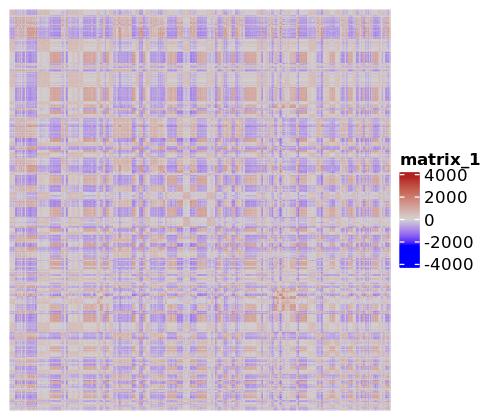

In [11]:
options(repr.plot.width = 4, repr.plot.height = 3.5)
Heatmap(matnum[cells,cells], cluster_rows = F, cluster_columns = F, show_row_dend = F, show_column_dend = F,
        show_column_names = F, show_row_names = F, 
        col = colorRamp2(c(min(matnum), 0,max(matnum)-1000), c("blue", "lightgrey","firebrick")))

In [4]:
kinship_file = "/hps/nobackup/hipsci/scratch/genotypes/imputed/2017-03-27/Full_Filtered_SNPs_Plink-F/hipsci.wec.gtarray.HumanCoreExome.imputed_phased.20170327.genotypes.norm.renamed.kinship"
kinship = read.csv(kinship_file, sep ='\t', row.names = 1)

In [5]:
kinship[1:5,1:5]

,HPSI0216i.tony_5,HPSI0216pf.tony,HPSI0316i.xaqm_4,HPSI0316i.tezs_6,HPSI0316pf.tezs
HPSI0216i-tony_5,1.1057400,1.0947100,0.0392708,0.0779168,0.0778040
HPSI0216pf-tony,1.0947100,1.1057100,0.0391130,0.0781138,0.0779813
HPSI0316i-xaqm_4,0.0392708,0.0391130,1.0818600,0.0285921,0.0282880
HPSI0316i-tezs_6,0.0779168,0.0781138,0.0285921,1.0840000,1.0750900
HPSI0316pf-tezs,0.0778040,0.0779813,0.0282880,1.0750900,1.0834000


In [6]:
head(top_donors)

[1] "HPSI0114i-joxm_1" "HPSI0214i-poih_4" "HPSI0314i-sojd_3" "HPSI0413i-nudd_1"
[5] "HPSI0514i-letw_1" "HPSI0813i-guss_1"

In [27]:
colnames(kinship) = gsub("\\.","-",colnames(kinship))
rownames(kinship) = gsub("\\.","-",rownames(kinship))
k_sel = kinship[top_donors,top_donors]
k_sel

,HPSI0114i-joxm_1,HPSI0214i-poih_4,HPSI0314i-sojd_3,HPSI0413i-nudd_1,HPSI0514i-letw_1,HPSI0813i-guss_1
HPSI0114i-joxm_1,0.99646000,-0.00562576,0.00782882,0.00112106,-0.00214355,-0.00462179
HPSI0214i-poih_4,-0.00562576,1.00243000,-0.00804561,-0.00760936,-0.00996133,0.00238234
HPSI0314i-sojd_3,0.00782882,-0.00804561,1.03609000,-0.00923976,-0.01126310,-0.00632627
HPSI0413i-nudd_1,0.00112106,-0.00760936,-0.00923976,0.98455200,0.00130588,-0.00520579
HPSI0514i-letw_1,-0.00214355,-0.00996133,-0.01126310,0.00130588,0.99533400,-0.00846296
HPSI0813i-guss_1,-0.00462179,0.00238234,-0.00632627,-0.00520579,-0.00846296,1.00745000


In [28]:
sce[,colnames(sce)=="21843_1#10"]$donor

[1] "joxm"

In [30]:
# matnum[1:5,1:5]

In [37]:
length(cells)

[1] 6185

In [31]:
k_expanded = matrix(0,nrow = length(cells), ncol = length(cells))
k_expanded[1:5,1:5]

0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0


In [54]:
k1 = 1
for (donor1 in top_donors){
    ncells1 = ncol(sce[,sce$donor_long_id == donor1])
    k2 = 1
    for (donor2 in top_donors){
        ncells2 = ncol(sce[,sce$donor_long_id == donor2])
        k_expanded[k1:(k1+ncells1-1),k2:(k2+ncells2-1)] = k_sel[donor1,donor2]
        k_expanded[k2:(k2+ncells2-1),k1:(k1+ncells1-1)] = k_sel[donor1,donor2]
        k2 = k2+ncells2
    }
    k1 = k1+ncells1
}

In [55]:
head(k_expanded)

0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,...,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179
0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,...,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179
0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,...,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179
0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,...,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179
0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,...,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179
0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,0.99646,...,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179,-0.00462179


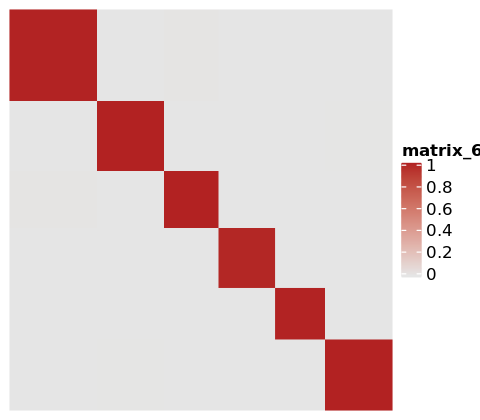

In [58]:
options(repr.plot.width = 4, repr.plot.height = 3.5)
Heatmap(k_expanded, cluster_rows = F, cluster_columns = F, show_row_dend = F, show_column_dend = F,
        show_column_names = F, show_row_names = F, 
        col = colorRamp2(c(0, 1), c("grey90","firebrick")))